In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df2 = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv' , index_col = 'id')

In [4]:
df2.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
df2.shape

(136429, 13)

In [6]:
df2.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [7]:
df2.corr()['Machine failure']

/tmp/ipykernel_20/2965620365.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['Machine failure']


Air temperature [K]        0.067744
Process temperature [K]    0.030966
Rotational speed [rpm]    -0.060868
Torque [Nm]                0.145793
Tool wear [min]            0.056448
Machine failure            1.000000
TWF                        0.311919
HDF                        0.564507
PWF                        0.383941
OSF                        0.494668
RNF                        0.001428
Name: Machine failure, dtype: float64

In [8]:
df2 = df2.drop(['Product ID'] , axis = 1)

In [9]:
df2.shape

(136429, 12)

In [10]:
df2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


<Axes: xlabel='Machine failure', ylabel='RNF'>

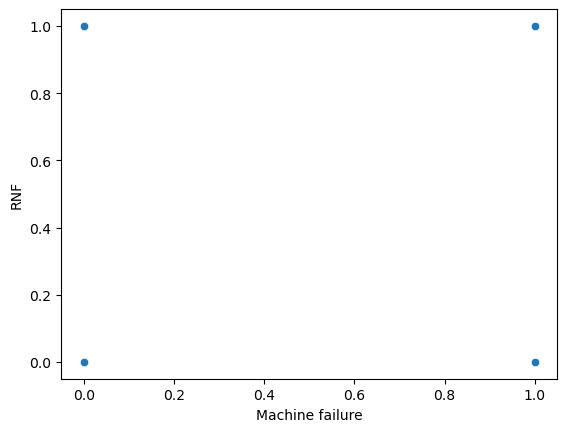

In [11]:
sns.scatterplot(data = df2 , x = 'Machine failure' , y = 'RNF')

In [12]:
df2['RNF'].value_counts()

0    136121
1       308
Name: RNF, dtype: int64

In [13]:
df2['OSF'].value_counts()

0    135889
1       540
Name: OSF, dtype: int64

In [14]:
df2.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split , GridSearchCV

In [16]:
X = pd.get_dummies(df2.drop('Machine failure' , axis = 1) , drop_first = True)

In [17]:
y = df2['Machine failure']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_model = LogisticRegression(max_iter = 1000000 ,solver = 'liblinear')

In [21]:
param_grid = {'penalty' : ['l1' , 'l2'] , 'C' : [0.1,0.2,0.3,0.4,0.5,0.6]}

In [22]:
grid_model = GridSearchCV(log_model,param_grid , error_score='raise')

In [23]:
grid_model.fit(X_train,y_train)

GridSearchCV(error_score='raise',
             estimator=LogisticRegression(max_iter=1000000, solver='liblinear'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'penalty': ['l1', 'l2']})

In [24]:
y_pred = grid_model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,RocCurveDisplay , ConfusionMatrixDisplay , confusion_matrix

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44326
           1       0.99      0.76      0.86       696

    accuracy                           1.00     45022
   macro avg       0.99      0.88      0.93     45022
weighted avg       1.00      1.00      1.00     45022



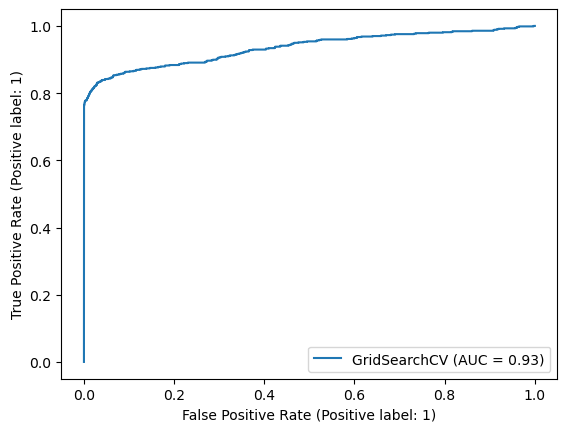

In [27]:
RocCurveDisplay.from_estimator(grid_model , X_test,y_test)

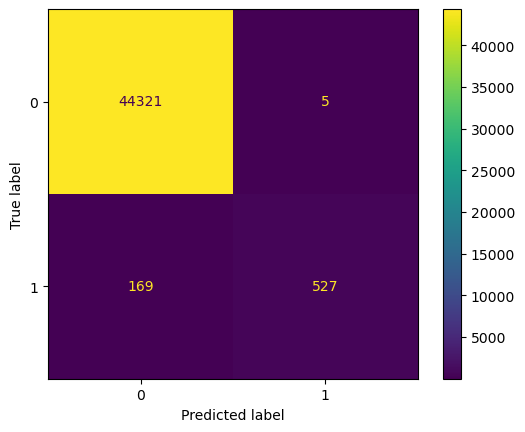

In [28]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [29]:
df3 = pd.read_csv(r'/kaggle/input/playground-series-s3e17/test.csv' , index_col = 'id' )

In [30]:
df3.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,
136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [31]:
df3.shape

(90954, 12)

In [32]:
df3 = df3.drop('Product ID' , axis = 1)

In [33]:
df3 = pd.get_dummies(df3 , drop_first = True)

In [34]:
df3.shape

(90954, 12)

In [35]:
df1_pred = pd.DataFrame(grid_model.predict(df3) , index = np.arange(136429,227383))

In [36]:
final_sub1 = pd.DataFrame(df1_pred)

In [37]:
final_sub1.to_csv(r'/kaggle/working/final_sub1.csv')